# Imporat modules and generate data

In [2]:
import scipy
import numpy
import pandas
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

def generate_dataset():
    temp_list = []
    count = 0
    for temp in range(0,25,1):
        for wind in range(0,22,1):
            if wind < 8 and temp < 10:
                feel_temp = temp - wind//4
            elif wind < 15 and  temp < 17:
                feel_temp = temp - wind//3
            else:
                feel_temp = temp - wind//2
            #feel_temp = temp - wind
            temp_list.append([temp, wind, feel_temp])
            count = count + 1
            if count >= 530:
                break
    return numpy.array(temp_list)
    
data = generate_dataset()
#print(data)
dataset = pandas.DataFrame({"Temp" : data[:,0],
                        "Wind": data[:,1],
                        "FellTemp": data[:,2]})

# Data Analysis

(530, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Temp      530 non-null    int32
 1   Wind      530 non-null    int32
 2   FellTemp  530 non-null    int32
dtypes: int32(3)
memory usage: 6.3 KB
   Temp  Wind  FellTemp
0     0     0         0
1     0     1         0
2     0     2         0
3     0     3         0
4     0     4        -1
     Temp  Wind  FellTemp
525    23    19        14
526    23    20        13
527    23    21        13
528    24     0        24
529    24     1        24
            Temp        Wind    FellTemp
count  530.00000  530.000000  530.000000
mean    11.54717   10.462264    7.232075
std      6.95806    6.368006    7.441067
min      0.00000    0.000000  -10.000000
25%      6.00000    5.000000    2.000000
50%     12.00000   10.000000    8.000000
75%     18.00000   16.000000   13.000000
max     24.00000   21.000000   24.00

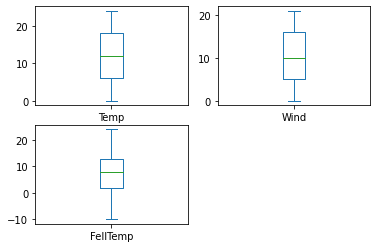


 scatter_matrix: 



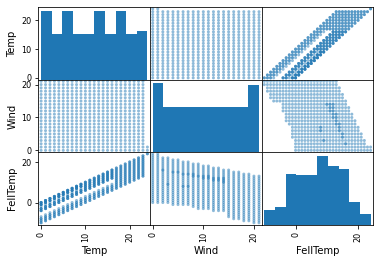

In [3]:
#print(data)

print(dataset.shape)
dataset.info()
print(dataset.head())
print(dataset.tail())
print(dataset.describe())

print("\n plot: \n")
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(dataset)
plt.show()




# Split data into training and test

In [4]:
array = dataset.values
X = array[:, 0:2]
Y = array[:, 2]
test_size = 0.056
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

print(Y_test.shape)
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)



(30,)


# Select best K value

KNN: k= 2 mse =  0.3765
KNN: k= 3 mse =  0.22288888888888886
KNN: k= 4 mse =  0.207125
KNN: k= 5 mse =  0.25456
KNN: k= 6 mse =  0.2738333333333333
KNN: k= 7 mse =  0.26257142857142857
KNN: k= 8 mse =  0.277375
KNN: k= 9 mse =  0.30679012345679013
KNN: k= 10 mse =  0.32202000000000003
KNN: k= 11 mse =  0.3556198347107438
KNN: k= 12 mse =  0.3725416666666666
KNN: k= 13 mse =  0.41110059171597635
KNN: k= 14 mse =  0.42584693877551016
KNN: k= 15 mse =  0.4379466666666667
KNN: k= 16 mse =  0.457703125
KNN: k= 17 mse =  0.47655363321799304
KNN: k= 18 mse =  0.4887345679012346
KNN: k= 19 mse =  0.5172243767313018
KNN: k= 20 mse =  0.5408050000000001
KNN: k= 21 mse =  0.5652879818594103
KNN: k= 22 mse =  0.5872685950413222
KNN: k= 23 mse =  0.5887637051039697
KNN: k= 24 mse =  0.6133263888888887


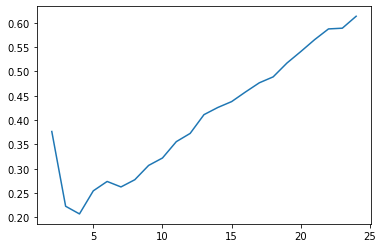

In [5]:
error = []
for k in range(2,25,1):
    y_pred = model_selection.cross_val_predict(KNeighborsRegressor(n_neighbors=k), X_train, Y_train, cv=kfold)
    mse = mean_squared_error(Y_train, y_pred)
    print("KNN: k=", k, "mse = ", mse)
    error.append(mse)

#Knr = KNeighborsRegressor(n_neighbors=k, weights='uniform')
plt.plot(range(2,25,1), error)

# Apply KNN and Linear regression algorithm on test dataset

In [8]:

# Make predictions on validation dataset
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)

print("\nThe KNN MSE  : " + str(mean_squared_error(Y_test, knn_predictions)))

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg_predictions = lin_reg.predict(X_test)

print("\nThe LinearRegression MSE  : " + str(mean_squared_error(Y_test, lin_reg_predictions)))
print("\n LinearRegression intercept = ", lin_reg.intercept_)
print("\n LinearRegression coef = ", lin_reg.coef_)
print("\n LinearRegression score = ", lin_reg.score(X_test, Y_test))


The KNN MSE  : 0.18125

The LinearRegression MSE  : 0.6845198558333373

 LinearRegression intercept =  1.718181885811961

 LinearRegression coef =  [ 0.94758522 -0.51900356]

 LinearRegression score =  0.9834252234321611
